In [1]:
import os
from pathlib import Path
from os import path

import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
import statsmodels.api as sm

from matplotlib import pyplot as plt

# 1. Input data

In [2]:
cwd = os.getcwd()
root_dir = Path(cwd).parent

In [3]:
# SET INPUTs & DIRECTORIES

# Household data
data_HH_tot = pd.read_csv(path.join(root_dir,
                                    "data/household_data.csv"))

# 2. Preprocess data

In [4]:
# Recode perceived safety to go to WC
wc_unsf_mask = ((data_HH_tot["ToiletFacilitySAFE"]=="During_Day")|(data_HH_tot["ToiletFacilitySAFE"]=="Unsafe"))
data_HH_tot["WCunsafe"] = np.nan
data_HH_tot["WCunsafe"][~data_HH_tot["ToiletFacilitySAFE"].isna()] = 0
data_HH_tot["WCunsafe"][wc_unsf_mask] = 1

<ipython-input-4-91e9218a5d11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_HH_tot["WCunsafe"][~data_HH_tot["ToiletFacilitySAFE"].isna()] = 0
<ipython-input-4-91e9218a5d11>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_HH_tot["WCunsafe"][wc_unsf_mask] = 1


# 3. Statistical analyses

## 3.1. Prevalence of lack of safety, by site

In [5]:
## Build table with prevalence of perceived unsafety, by site

# Subset: only individuals to whom question applies (using a WC outside of their own plot/yard)
subset_WCunsafe = data_HH_tot[~data_HH_tot['WCunsafe'].isna()]

# Build table
WCunsafe_table = subset_WCunsafe[['SITE_ID','WCunsafe']].groupby('SITE_ID').agg('sum').reset_index()
WCunsafe_table.columns = ['Site','People reporting unsafe access to WC']
WCunsafe_table['Heads of household interviewed'] = np.nan
WCunsafe_table['Heads of household interviewed'] = subset_WCunsafe[['SITE_ID','KEY']].groupby('SITE_ID').agg('count').values
WCunsafe_table['Prevalence of unsafety'] = np.nan
WCunsafe_table['Prevalence of unsafety'] = (WCunsafe_table['People reporting unsafe access to WC']/WCunsafe_table['Heads of household interviewed'])*100
WCunsafe_table

,Site,People reporting unsafe access to WC,Heads of household interviewed,Prevalence of unsafety
0,Azito,8.0,64,12.500000
1,Mathare,244.0,522,46.743295
2,Mukuru,15.0,553,2.712477
3,Williamsville,62.0,217,28.571429


## 3.2. Perceived safety and urban morphology, by site
Bivariate logit regressions to identify global trends and potential explanatory variables for insecurity, that are be derived from settlement morphology

### 3.2.1 Bivariate logit regressions and tests of significance

Note: analysis with 'WCunsafe' variable is relevant for a limited number of observations in each site (only households using a toilet outside their own dwelling); for instance in Azito, the safety question applied only to 64 (out of 267) households.

b_area


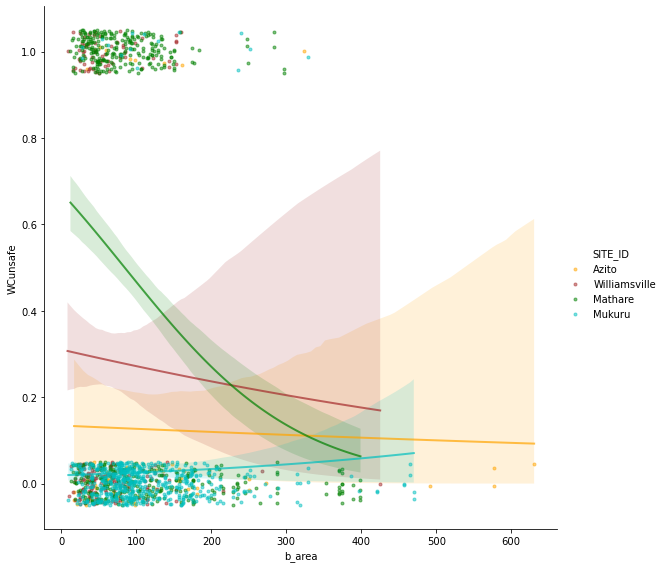

Optimization terminated successfully.
         Current function value: 0.376402
         Iterations 6
stats for: b_area in Azito
valid obs.: 64
logit model's predictive score (based on confusion matrix): 0.875
Prob. (P>|z|): 0.832958 Beta coeff.: -0.0006662955257644723 LLR p-value: 0.828089 Pseudo R-sq: 0.000978
Optimization terminated successfully.
         Current function value: 0.597587
         Iterations 5
stats for: b_area in Williamsville
valid obs.: 217
logit model's predictive score (based on confusion matrix): 0.7142857142857143
Prob. (P>|z|): 0.59514 Beta coeff.: -0.0018611925019277188 LLR p-value: 0.586246 Pseudo R-sq: 0.001141
Optimization terminated successfully.
         Current function value: 0.646798
         Iterations 5
stats for: b_area in Mathare
valid obs.: 522
logit model's predictive score (based on confusion matrix): 0.5766283524904214
Prob. (P>|z|): 0.0 Beta coeff.: -0.008582852055986336 LLR p-value: 0.0 Pseudo R-sq: 0.064001
Optimization terminated successf

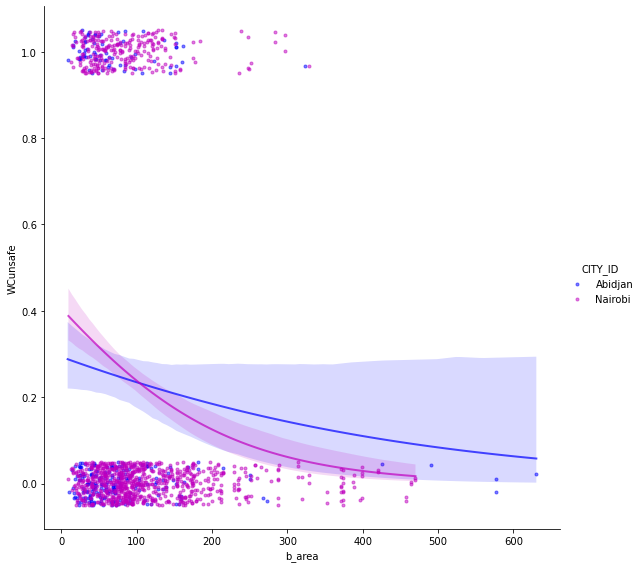

Optimization terminated successfully.
         Current function value: 0.557725
         Iterations 6
stats for: b_area in Abidjan
valid obs.: 281
logit model's predictive score (based on confusion matrix): 0.7508896797153025
Prob. (P>|z|): 0.200843 Beta coeff.: -0.0030266724669982745 LLR p-value: 0.153193 Pseudo R-sq: 0.006467
Optimization terminated successfully.
         Current function value: 0.530997
         Iterations 6
stats for: b_area in Nairobi
valid obs.: 1075
logit model's predictive score (based on confusion matrix): 0.7590697674418605
Prob. (P>|z|): 0.0 Beta coeff.: -0.007803225634538244 LLR p-value: 0.0 Pseudo R-sq: 0.03831
Optimization terminated successfully.
         Current function value: 0.537885
         Iterations 6
valid obs.: 1356
logit model's predictive score (based on confusion matrix): 0.7573746312684366
Prob. (P>|z|): 0.0 Beta coeff.: -0.006710530552336175 LLR p-value: 0.0 Pseudo R-sq: 0.029241


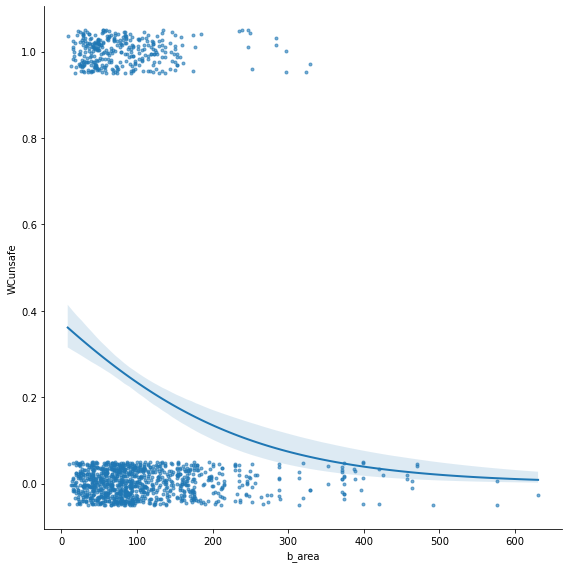

NN_100


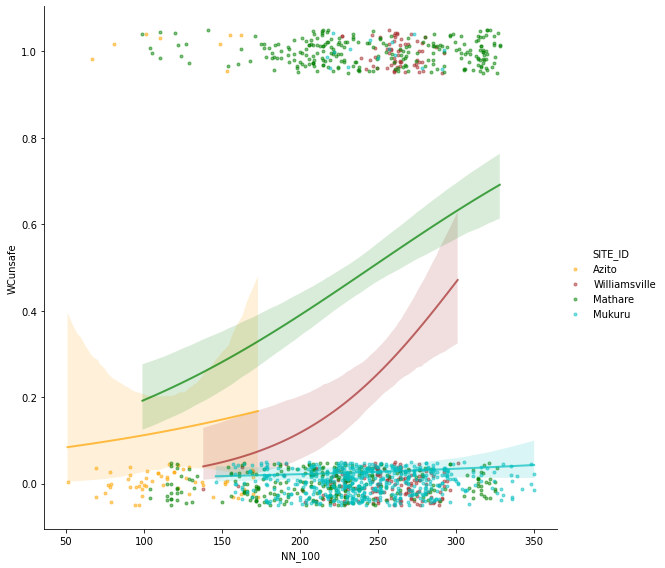

Optimization terminated successfully.
         Current function value: 0.374530
         Iterations 6
stats for: NN_100 in Azito
valid obs.: 64
logit model's predictive score (based on confusion matrix): 0.875
Prob. (P>|z|): 0.592488 Beta coeff.: 0.0064179220181925884 LLR p-value: 0.592309 Pseudo R-sq: 0.005946
Optimization terminated successfully.
         Current function value: 0.581351
         Iterations 6
stats for: NN_100 in Williamsville
valid obs.: 217
logit model's predictive score (based on confusion matrix): 0.7142857142857143
Prob. (P>|z|): 0.011511 Beta coeff.: 0.01878519952358559 LLR p-value: 0.006734 Pseudo R-sq: 0.028278
Optimization terminated successfully.
         Current function value: 0.657201
         Iterations 5
stats for: NN_100 in Mathare
valid obs.: 522
logit model's predictive score (based on confusion matrix): 0.6226053639846744
Prob. (P>|z|): 0.0 Beta coeff.: 0.009802333125429422 LLR p-value: 0.0 Pseudo R-sq: 0.048947
Optimization terminated successfully

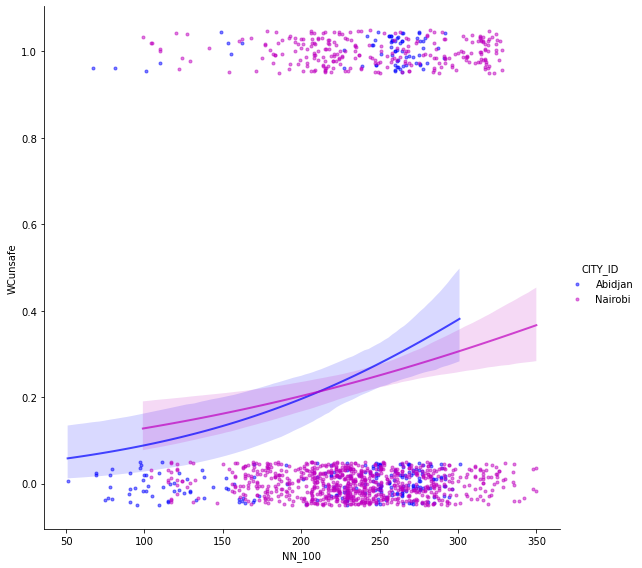

Optimization terminated successfully.
         Current function value: 0.538063
         Iterations 6
stats for: NN_100 in Abidjan
valid obs.: 281
logit model's predictive score (based on confusion matrix): 0.7508896797153025
Prob. (P>|z|): 0.001242 Beta coeff.: 0.009188648555581574 LLR p-value: 0.000297 Pseudo R-sq: 0.041493
Optimization terminated successfully.
         Current function value: 0.545988
         Iterations 5
stats for: NN_100 in Nairobi
valid obs.: 1075
logit model's predictive score (based on confusion matrix): 0.7590697674418605
Prob. (P>|z|): 0.000324 Beta coeff.: 0.005486950635267411 LLR p-value: 0.000273 Pseudo R-sq: 0.01116
Optimization terminated successfully.
         Current function value: 0.545035
         Iterations 6
valid obs.: 1356
logit model's predictive score (based on confusion matrix): 0.7573746312684366
Prob. (P>|z|): 2e-06 Beta coeff.: 0.006336660282112945 LLR p-value: 1e-06 Pseudo R-sq: 0.016337


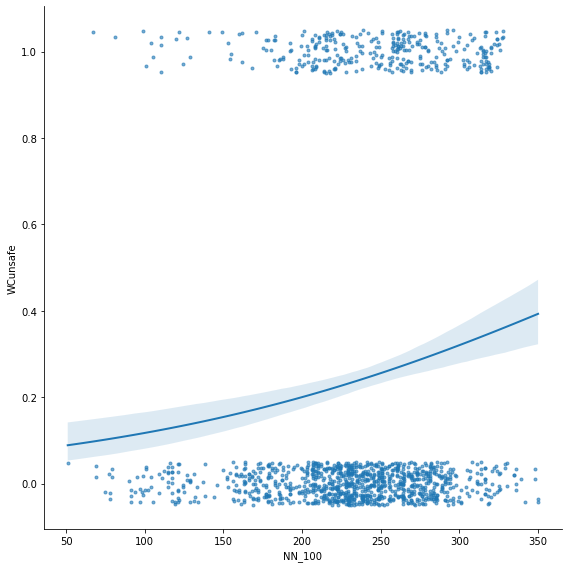

n_blg_ccM


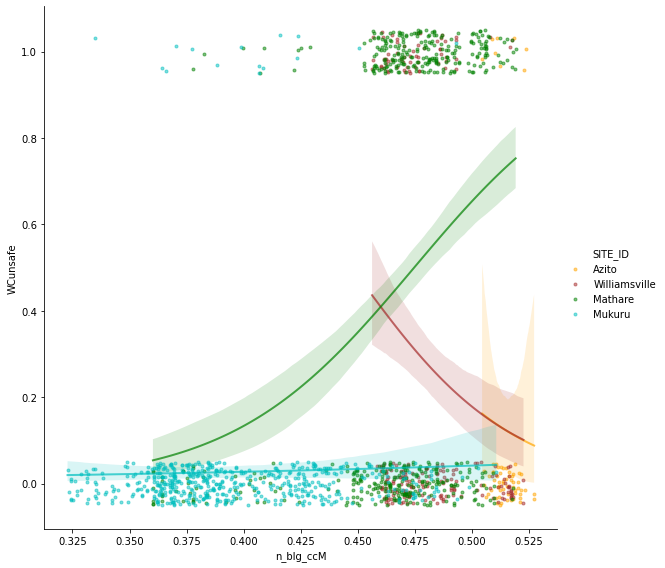

Optimization terminated successfully.
         Current function value: 0.375366
         Iterations 7
stats for: n_blg_ccM in Azito
valid obs.: 64
logit model's predictive score (based on confusion matrix): 0.875
Prob. (P>|z|): 0.67397 Beta coeff.: -30.48649820459284 LLR p-value: 0.671625 Pseudo R-sq: 0.003726
Optimization terminated successfully.
         Current function value: 0.575690
         Iterations 6
stats for: n_blg_ccM in Williamsville
valid obs.: 217
logit model's predictive score (based on confusion matrix): 0.7142857142857143
Prob. (P>|z|): 0.003439 Beta coeff.: -29.051585454617882 LLR p-value: 0.001746 Pseudo R-sq: 0.037742
Optimization terminated successfully.
         Current function value: 0.633013
         Iterations 6
stats for: n_blg_ccM in Mathare
valid obs.: 522
logit model's predictive score (based on confusion matrix): 0.6245210727969349
Prob. (P>|z|): 0.0 Beta coeff.: 25.04833131215639 LLR p-value: 0.0 Pseudo R-sq: 0.08395
Optimization terminated successfull

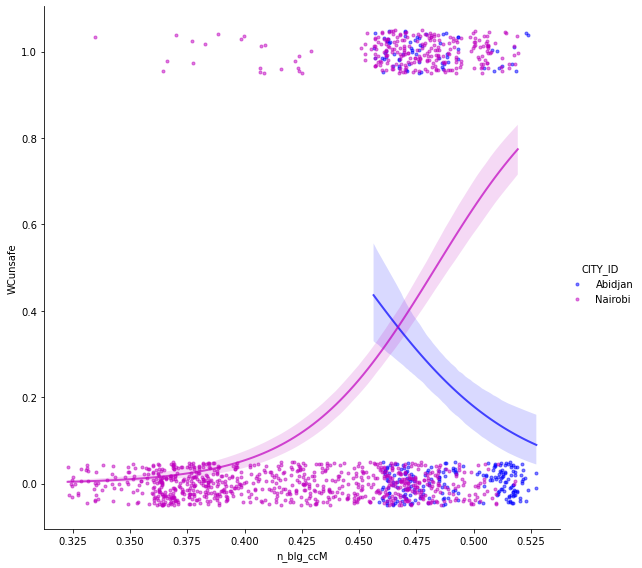

Optimization terminated successfully.
         Current function value: 0.530065
         Iterations 6
stats for: n_blg_ccM in Abidjan
valid obs.: 281
logit model's predictive score (based on confusion matrix): 0.7508896797153025
Prob. (P>|z|): 7.4e-05 Beta coeff.: -29.06215636921862 LLR p-value: 2.7e-05 Pseudo R-sq: 0.055741
Optimization terminated successfully.
         Current function value: 0.407956
         Iterations 7
stats for: n_blg_ccM in Nairobi
valid obs.: 1075
logit model's predictive score (based on confusion matrix): 0.7832558139534884
Prob. (P>|z|): 0.0 Beta coeff.: 34.3844743769441 LLR p-value: 0.0 Pseudo R-sq: 0.261151
Optimization terminated successfully.
         Current function value: 0.479396
         Iterations 7
valid obs.: 1356
logit model's predictive score (based on confusion matrix): 0.7101769911504425
Prob. (P>|z|): 0.0 Beta coeff.: 21.56520683150944 LLR p-value: 0.0 Pseudo R-sq: 0.134801


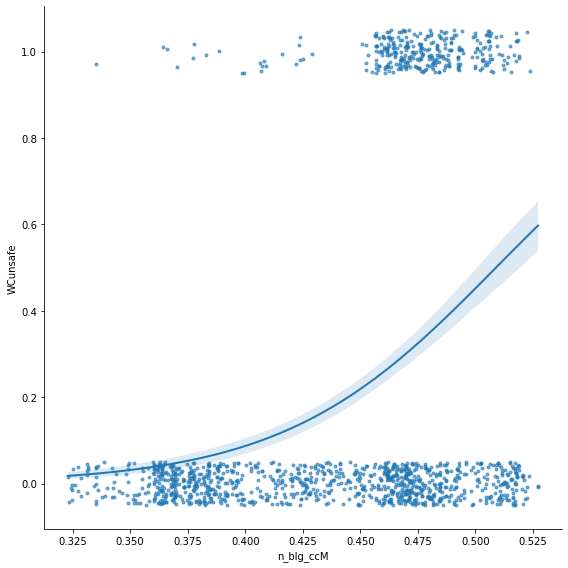

n_CARM


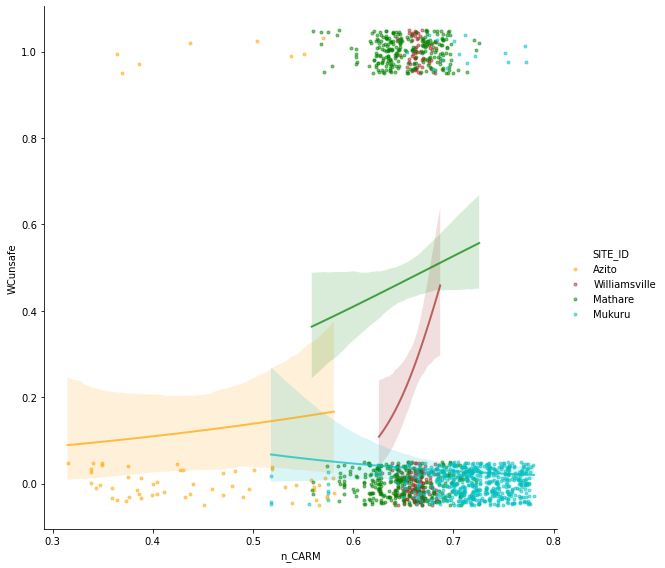

Optimization terminated successfully.
         Current function value: 0.374047
         Iterations 6
stats for: n_CARM in Azito
valid obs.: 64
logit model's predictive score (based on confusion matrix): 0.875
Prob. (P>|z|): 0.555425 Beta coeff.: 2.6915502977154153 LLR p-value: 0.554956 Pseudo R-sq: 0.007227
Optimization terminated successfully.
         Current function value: 0.587114
         Iterations 5
stats for: n_CARM in Williamsville
valid obs.: 217
logit model's predictive score (based on confusion matrix): 0.7142857142857143
Prob. (P>|z|): 0.031479 Beta coeff.: 31.709288680917634 LLR p-value: 0.027785 Pseudo R-sq: 0.018646
Optimization terminated successfully.
         Current function value: 0.688264
         Iterations 4
stats for: n_CARM in Mathare
valid obs.: 522
logit model's predictive score (based on confusion matrix): 0.5268199233716475
Prob. (P>|z|): 0.090897 Beta coeff.: 4.722298782199121 LLR p-value: 0.089605 Pseudo R-sq: 0.003994
Optimization terminated successfu

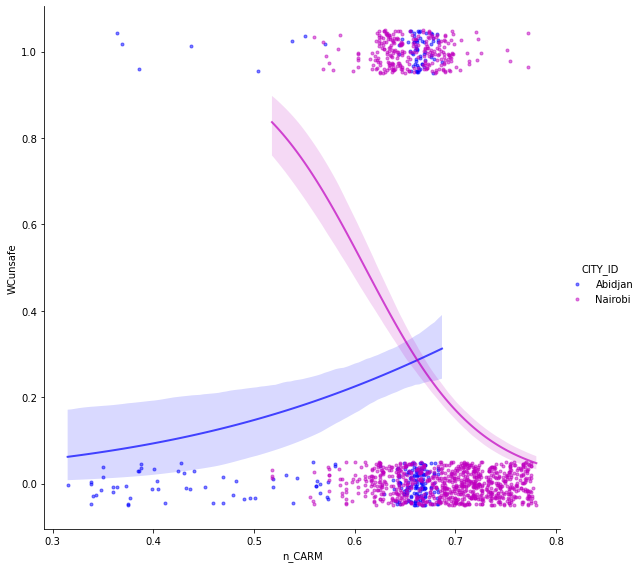

Optimization terminated successfully.
         Current function value: 0.545104
         Iterations 6
stats for: n_CARM in Abidjan
valid obs.: 281
logit model's predictive score (based on confusion matrix): 0.7508896797153025
Prob. (P>|z|): 0.008399 Beta coeff.: 5.188768989936675 LLR p-value: 0.00251 Pseudo R-sq: 0.028951
Optimization terminated successfully.
         Current function value: 0.491547
         Iterations 6
stats for: n_CARM in Nairobi
valid obs.: 1075
logit model's predictive score (based on confusion matrix): 0.7386046511627907
Prob. (P>|z|): 0.0 Beta coeff.: -17.654836138199357 LLR p-value: 0.0 Pseudo R-sq: 0.109757
Optimization terminated successfully.
         Current function value: 0.543955
         Iterations 5
valid obs.: 1356
logit model's predictive score (based on confusion matrix): 0.7411504424778761
Prob. (P>|z|): 0.0 Beta coeff.: -4.511182704838137 LLR p-value: 0.0 Pseudo R-sq: 0.018286


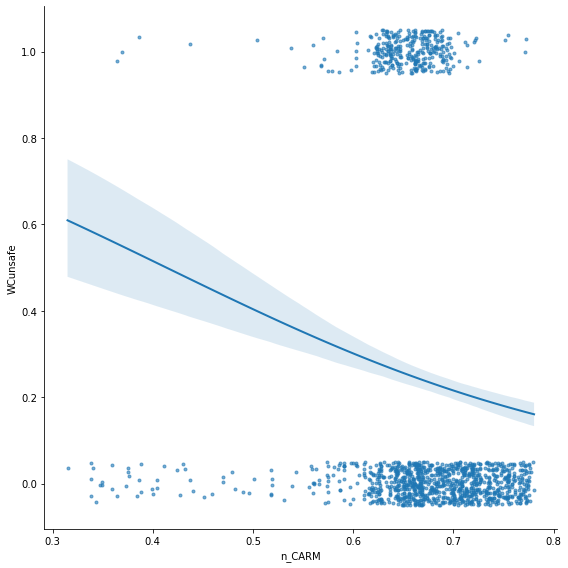

n_mn_BdevM


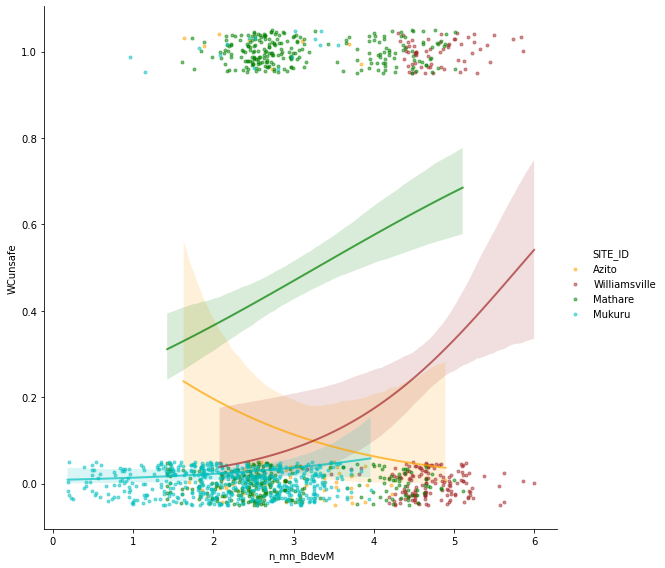

Optimization terminated successfully.
         Current function value: 0.365581
         Iterations 6
stats for: n_mn_BdevM in Azito
valid obs.: 64
logit model's predictive score (based on confusion matrix): 0.875
Prob. (P>|z|): 0.244732 Beta coeff.: -0.6438405456919212 LLR p-value: 0.231393 Pseudo R-sq: 0.029699
Optimization terminated successfully.
         Current function value: 0.585055
         Iterations 5
stats for: n_mn_BdevM in Williamsville
valid obs.: 217
logit model's predictive score (based on confusion matrix): 0.7142857142857143
Prob. (P>|z|): 0.021751 Beta coeff.: 0.8623065659796092 LLR p-value: 0.016628 Pseudo R-sq: 0.022088
Optimization terminated successfully.
         Current function value: 0.674161
         Iterations 4
stats for: n_mn_BdevM in Mathare
valid obs.: 522
logit model's predictive score (based on confusion matrix): 0.5632183908045977
Prob. (P>|z|): 3.8e-05 Beta coeff.: 0.42691873490478577 LLR p-value: 2.7e-05 Pseudo R-sq: 0.024404
Optimization termina

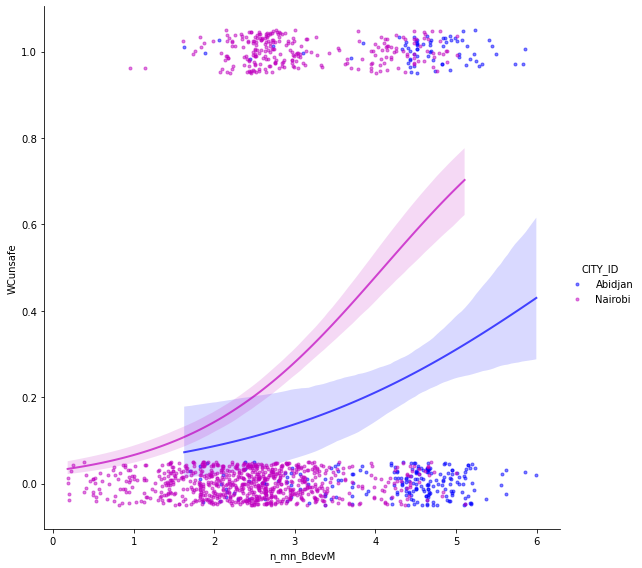

Optimization terminated successfully.
         Current function value: 0.545409
         Iterations 6
stats for: n_mn_BdevM in Abidjan
valid obs.: 281
logit model's predictive score (based on confusion matrix): 0.7508896797153025
Prob. (P>|z|): 0.005793 Beta coeff.: 0.5186876054043289 LLR p-value: 0.002756 Pseudo R-sq: 0.028408
Optimization terminated successfully.
         Current function value: 0.500606
         Iterations 6
stats for: n_mn_BdevM in Nairobi
valid obs.: 1075
logit model's predictive score (based on confusion matrix): 0.7674418604651163
Prob. (P>|z|): 0.0 Beta coeff.: 0.8550883798115233 LLR p-value: 0.0 Pseudo R-sq: 0.093351
Optimization terminated successfully.
         Current function value: 0.526842
         Iterations 6
valid obs.: 1356
logit model's predictive score (based on confusion matrix): 0.7558997050147492
Prob. (P>|z|): 0.0 Beta coeff.: 0.4777858602651456 LLR p-value: 0.0 Pseudo R-sq: 0.049171


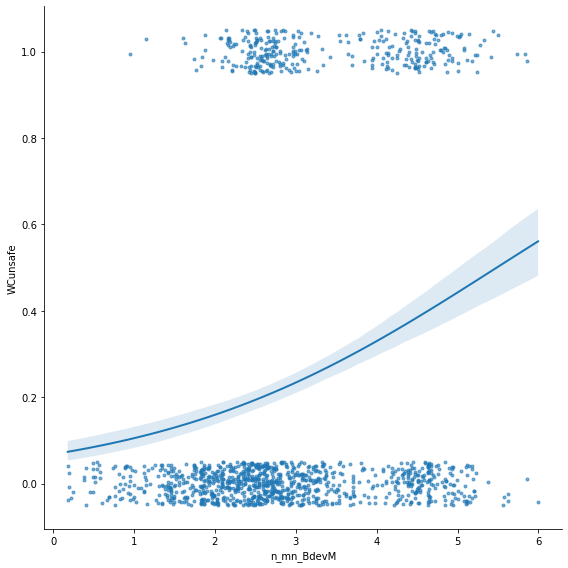

HH_Recor_2_std


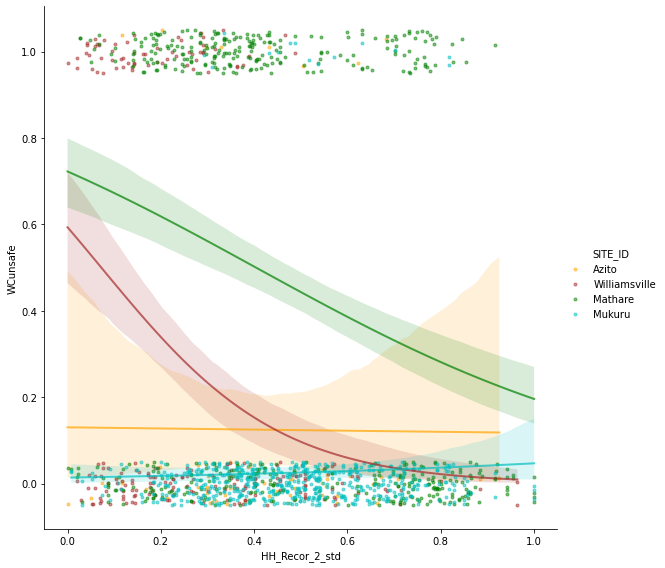

Optimization terminated successfully.
         Current function value: 0.376742
         Iterations 6
stats for: HH_Recor_2_std in Azito
valid obs.: 64
logit model's predictive score (based on confusion matrix): 0.875
Prob. (P>|z|): 0.952523 Beta coeff.: -0.11933286083766768 LLR p-value: 0.952483 Pseudo R-sq: 7.4e-05
Optimization terminated successfully.
         Current function value: 0.535297
         Iterations 6
stats for: HH_Recor_2_std in Williamsville
valid obs.: 214
logit model's predictive score (based on confusion matrix): 0.7149532710280374
Prob. (P>|z|): 4e-06 Beta coeff.: -5.2223407643719675 LLR p-value: 0.0 Pseudo R-sq: 0.110656
Optimization terminated successfully.
         Current function value: 0.650453
         Iterations 5
stats for: HH_Recor_2_std in Mathare
valid obs.: 510
logit model's predictive score (based on confusion matrix): 0.6235294117647059
Prob. (P>|z|): 0.0 Beta coeff.: -2.368707139381802 LLR p-value: 0.0 Pseudo R-sq: 0.057407
Optimization terminated 

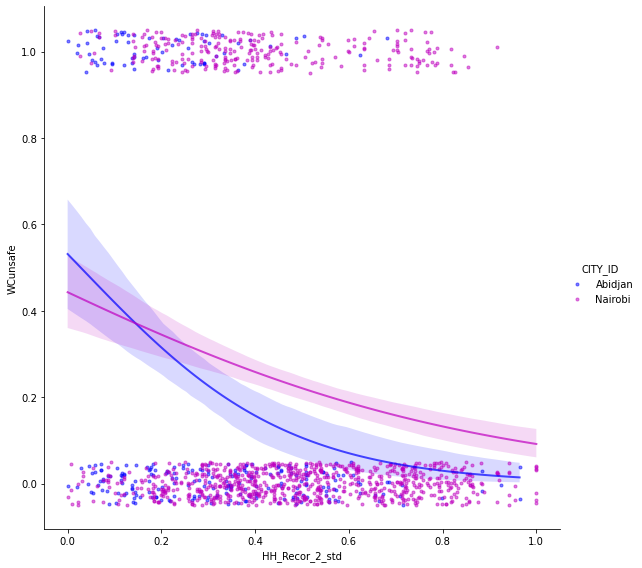

Optimization terminated successfully.
         Current function value: 0.511472
         Iterations 6
stats for: HH_Recor_2_std in Abidjan
valid obs.: 278
logit model's predictive score (based on confusion matrix): 0.7517985611510791
Prob. (P>|z|): 1e-06 Beta coeff.: -4.51023347089718 LLR p-value: 0.0 Pseudo R-sq: 0.093621
Optimization terminated successfully.
         Current function value: 0.530664
         Iterations 6
stats for: HH_Recor_2_std in Nairobi
valid obs.: 1050
logit model's predictive score (based on confusion matrix): 0.7628571428571429
Prob. (P>|z|): 0.0 Beta coeff.: -2.063304700723125 LLR p-value: 0.0 Pseudo R-sq: 0.031218
Optimization terminated successfully.
         Current function value: 0.530512
         Iterations 6
valid obs.: 1328
logit model's predictive score (based on confusion matrix): 0.759789156626506
Prob. (P>|z|): 0.0 Beta coeff.: -2.227150521719831 LLR p-value: 0.0 Pseudo R-sq: 0.037747


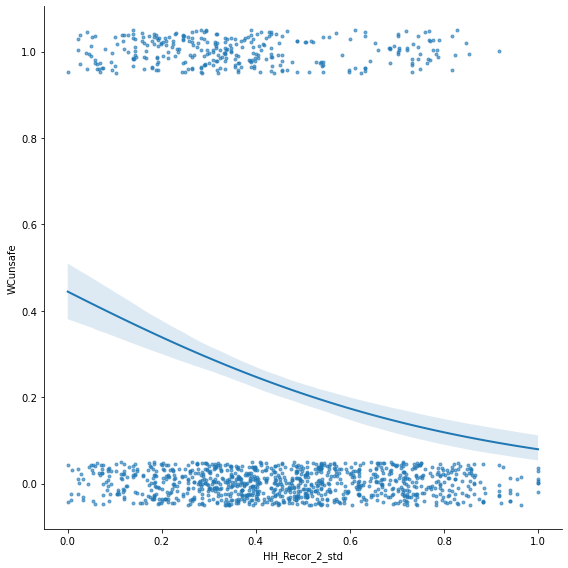

dist2wc


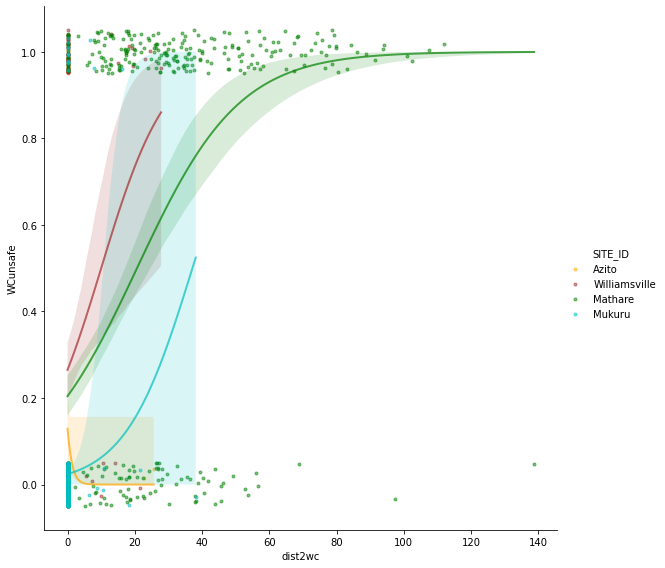

         Current function value: 0.372526
         Iterations: 35
stats for: dist2wc in Azito
valid obs.: 64
logit model's predictive score (based on confusion matrix): 0.875
Prob. (P>|z|): 0.999982 Beta coeff.: -1.1541271967098055 LLR p-value: 0.461085 Pseudo R-sq: 0.011265
Optimization terminated successfully.
         Current function value: 0.580051
         Iterations 5
stats for: dist2wc in Williamsville
valid obs.: 214
logit model's predictive score (based on confusion matrix): 0.7289719626168224
Prob. (P>|z|): 0.005456 Beta coeff.: 0.10192150979552979 LLR p-value: 0.002228 Pseudo R-sq: 0.0363
Optimization terminated successfully.
         Current function value: 0.516154
         Iterations 6
stats for: dist2wc in Mathare
valid obs.: 510
logit model's predictive score (based on confusion matrix): 0.7470588235294118
Prob. (P>|z|): 0.0 Beta coeff.: 0.06588987654182649 LLR p-value: 0.0 Pseudo R-sq: 0.252025
Optimization terminated successfully.
         Current function value: 0.1

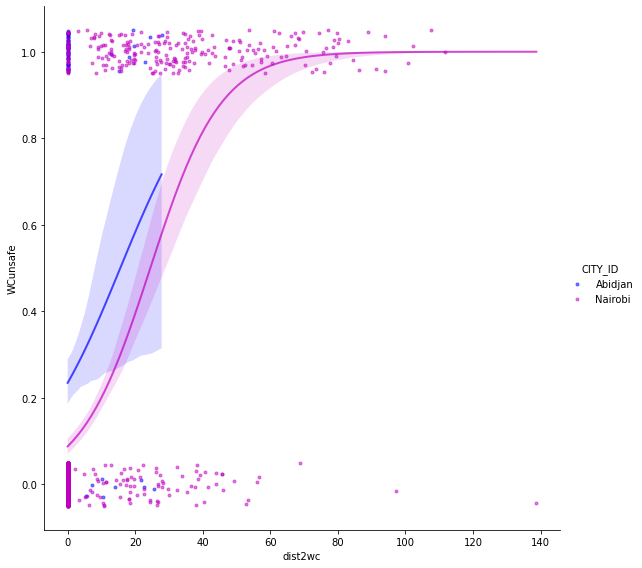

Optimization terminated successfully.
         Current function value: 0.551603
         Iterations 5
stats for: dist2wc in Abidjan
valid obs.: 278
logit model's predictive score (based on confusion matrix): 0.7589928057553957
Prob. (P>|z|): 0.008981 Beta coeff.: 0.0758491779769099 LLR p-value: 0.007877 Pseudo R-sq: 0.022506
Optimization terminated successfully.
         Current function value: 0.347248
         Iterations 7
stats for: dist2wc in Nairobi
valid obs.: 1050
logit model's predictive score (based on confusion matrix): 0.861904761904762
Prob. (P>|z|): 0.0 Beta coeff.: 0.0955580969636266 LLR p-value: 0.0 Pseudo R-sq: 0.366062
Optimization terminated successfully.
         Current function value: 0.403932
         Iterations 6
valid obs.: 1328
logit model's predictive score (based on confusion matrix): 0.8403614457831325
Prob. (P>|z|): 0.0 Beta coeff.: 0.08439335937121852 LLR p-value: 0.0 Pseudo R-sq: 0.267341


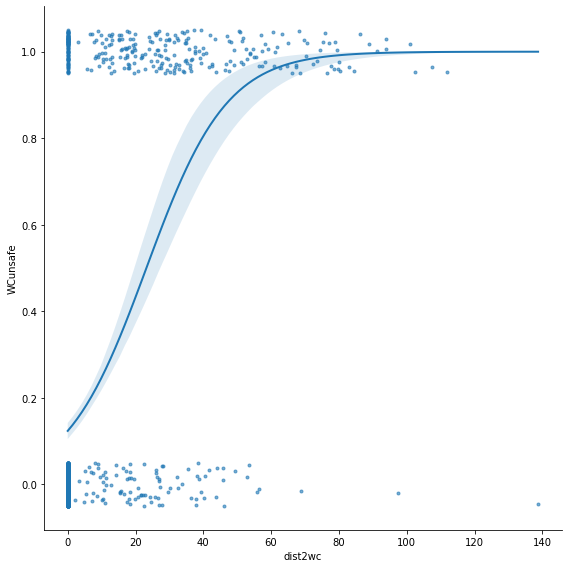

In [6]:
## Run bivariate logit regressions

# Define list of independent variables (density, entropy, topography & sanitation variables)
reg_var_list = ['b_area',
                'NN_100', # (density) number of buildings/shacks within a 100 m radius
                'n_blg_ccM', # (density) mean compactedness of buildings' footprints within a 100 m radius
                'n_CARM', # (density) mean CAR within a 100 m radius
                'n_mn_BdevM', # (entropy) mean deviation from first 4 neighbours within a 100 m radius
                'HH_Recor_2_std', # (topography) standardized altitude level (0-1, 0 = lowest level / 1 = highest level)
                'dist2wc'] # (sanitation) euclidean distance to WC most used (calculatetd only for households using WC out of premises)

# Dummy dataset
data_g = data_HH_tot.copy()

# Empty dataframe
df_logitreg_mosf = pd.DataFrame()
df_logitreg_msf2 = pd.DataFrame()

# Logit plots
for var in reg_var_list:
    mask = (~data_g[var].isna())&(~data_g['WCunsafe'].isna())
    data_g = data_g[mask]
    print(var)
    
    # 1. plot by site
    data_g_check = data_g.copy()
    for site in list(data_g_check['SITE_ID'].unique()):
        dummy = data_g[data_g['SITE_ID']==site]
        if dummy[var].max()==0:
            data_g_check = data_g_check[data_g_check['SITE_ID']!=site]
    sns_plot = sns.lmplot(x=var,
                          y='WCunsafe',
                          data=data_g_check, # 'data_g_check' may exclude one or more sites, if all values are 0 (e.g., 'NN_100P' in Azito)
                          logistic=True,
                          hue='SITE_ID',
                          y_jitter=.05,
                          scatter_kws={'s':9,'alpha':0.5},
                          line_kws={'alpha':0.7,'lw': 2},
                          height=8, aspect=1,
                          palette=dict(Azito="orange", Williamsville="brown",
                                       Mathare="g", Mukuru="c")
                         )
    # Plot
    plt.show()
    # Logistic regression stats by site
    for site in list(data_g_check['SITE_ID'].unique()):
        log_reg = sm.Logit(data_g_check['WCunsafe'][data_g_check['SITE_ID']==site],
                           sm.add_constant(data_g_check[var][data_g_check['SITE_ID']==site])
                          ).fit()
        print("stats for:",var,"in",site)
        print("valid obs.:",data_g_check[data_g_check['SITE_ID']==site].shape[0])
        print("logit model's predictive score (based on confusion matrix):",
              (log_reg.pred_table()[0][0]+log_reg.pred_table()[1][1])/log_reg.pred_table().sum())
        print("Prob. (P>|z|):",
              round(log_reg.pvalues[1],6),
              "Beta coeff.:",
              log_reg.params[1],
              "LLR p-value:",
              round(log_reg.llr_pvalue,6),
              "Pseudo R-sq:",
              round(log_reg.prsquared,6)
             )
        # add results to dataframe
        df_logitreg_mosf = df_logitreg_mosf.append([[var,
                                                     site,
                                                     round(log_reg.pvalues[1],6),
                                                     round(log_reg.llr_pvalue,6),
                                                     round(log_reg.prsquared,6)
                                                    ]])
        print("============================================")
    
    # 2. plot by city
    sns_plot = sns.lmplot(x=var,
                          y='WCunsafe',
                          data=data_g,
                          logistic=True,
                          hue='CITY_ID',
                          y_jitter=.05,
                          scatter_kws={'s':9,'alpha':0.5},
                          line_kws={'alpha':0.7,'lw': 2},
                          height=8, aspect=1,
                          palette=dict(Abidjan="b",
                                       Nairobi="m")
                         )
    # Plot
    plt.show()
    # Logistic regression stats by city
    for site in list(data_g['CITY_ID'].unique()):
        log_reg = sm.Logit(data_g['WCunsafe'][data_g['CITY_ID']==site],
                           sm.add_constant(data_g[var][data_g['CITY_ID']==site])
                          ).fit()
        print("stats for:",var,"in",site)
        print("valid obs.:",data_g[data_g['CITY_ID']==site].shape[0])
        print("logit model's predictive score (based on confusion matrix):",
              (log_reg.pred_table()[0][0]+log_reg.pred_table()[1][1])/log_reg.pred_table().sum())
        print("Prob. (P>|z|):",
              round(log_reg.pvalues[1],6),
              "Beta coeff.:",
              log_reg.params[1],
              "LLR p-value:",
              round(log_reg.llr_pvalue,6),
              "Pseudo R-sq:",
              round(log_reg.prsquared,6)
             )
        # add results to dataframe
        df_logitreg_msf2 = df_logitreg_msf2.append([[var,
                                                     site,
                                                     round(log_reg.pvalues[1],6),
                                                     round(log_reg.llr_pvalue,6),
                                                     round(log_reg.prsquared,6)
                                                    ]])
        print("============================================")
    
    # 3. plot for all dataset
    sns.lmplot(x=var,
               y='WCunsafe',
               data=data_g,
               logistic=True,
               y_jitter=.05,
               scatter_kws={'s':9,'alpha':0.6},
               line_kws={'alpha':1,'lw': 2},
               height=8, aspect=1,
               palette='k'
              )
    # Logistic regression stats for all dataset
    log_reg = sm.Logit(data_g['WCunsafe'],
                       sm.add_constant(data_g[var])
                      ).fit()
    print("valid obs.:",data_g.shape[0])
    print("logit model's predictive score (based on confusion matrix):",
          (log_reg.pred_table()[0][0]+log_reg.pred_table()[1][1])/log_reg.pred_table().sum())
    print("Prob. (P>|z|):",
          round(log_reg.pvalues[1],6),
          "Beta coeff.:",
          log_reg.params[1],
          "LLR p-value:",
          round(log_reg.llr_pvalue,6),
          "Pseudo R-sq:",
          round(log_reg.prsquared,6)
         )
    # Plot
    plt.show()

# Reset columns' names & index
df_logitreg_mosf.columns = ['Variable','Site','p value','LLR p value','Pseudo R-squared']
df_logitreg_mosf = df_logitreg_mosf.reset_index()
df_logitreg_msf2.columns = ['Variable','Site','p value','LLR p value','Pseudo R-squared']
df_logitreg_msf2 = df_logitreg_msf2.reset_index()

### 3.2.2. Aggregated morphological indicators, by perceived safety group, and by city

In [7]:
## Recalculate table, based on safety variable ('WCunsafe')


## dummy dataset
db = data_HH_tot.copy()
# Recode safety variable
db['WCunsafe'][db['WCunsafe']==0] = 'Safe'
db['WCunsafe'][db['WCunsafe']==1] = 'Unsafe'


## Build table with mean neighbours within 100m radius

# Calculate built-up area (sum of buildings' footprints)
nn100_table = db[['CITY_ID','WCunsafe','NN_100']].groupby(['CITY_ID','WCunsafe']).agg('mean').reset_index()
nn100_table.columns = ['City','Lack of safety','Mean No neighbours in 100m']
nn100_table['NN 100 (scaled)'] =((nn100_table['Mean No neighbours in 100m'])/
                                 (nn100_table['Mean No neighbours in 100m'].max()))*100
nn100_table['ID'] = nn100_table['City']+', '+nn100_table['Lack of safety']


## Build table with mean compactness of buildings

# Build table
db['ID'] = np.array(range(db.shape[0]))
compacity_table = db[['CITY_ID','WCunsafe','n_blg_cc']].groupby(['CITY_ID','WCunsafe']).agg('mean').reset_index()
compacity_table.columns = ['City','Lack of safety','Mean compactness']
compacity_table['Mean compactness (scaled)'] =((compacity_table['Mean compactness'])/
                                               (compacity_table['Mean compactness'].max()))*100
compacity_table['ID'] = compacity_table['City']+', '+compacity_table['Lack of safety']


## Build table with mean covered-area-ratio

# Calculate built-up area (sum of buildings' footprints)
area_table = db[['CITY_ID','WCunsafe','n_CAR']].groupby(['CITY_ID','WCunsafe']).agg('mean').reset_index()
area_table.columns = ['City','Lack of safety','Mean C.A.R']
area_table['Mean C.A.R'] = area_table['Mean C.A.R']*100
area_table['Mean C.A.R (scaled)'] =((area_table['Mean C.A.R'])/
                                    (area_table['Mean C.A.R'].max()))*100
area_table['ID'] = area_table['City']+', '+area_table['Lack of safety']


## Build table with mean deviation from first 4 neighbours

# Build table
entropy_table = db[['CITY_ID','WCunsafe','n_mn_Bdev']].groupby(['CITY_ID','WCunsafe']).agg('mean').reset_index()
entropy_table.columns = ['City','Lack of safety','Mean deviation']
entropy_table['Entropy indicator (scaled)'] =((entropy_table['Mean deviation'])/
                                              (entropy_table['Mean deviation'].max()))*100
entropy_table['ID'] = entropy_table['City']+', '+entropy_table['Lack of safety']


## Build table with mean standardized elevation (HH_Recor_2_lag)

# Build table
topogr_table = db[['CITY_ID','WCunsafe','HH_Recor_2_std']].groupby(['CITY_ID','WCunsafe']).agg('mean').reset_index()
topogr_table.columns = ['City','Lack of safety','Mean elevation']
topogr_table['Mean elevation (scaled)'] =((topogr_table['Mean elevation'])/
                                          (topogr_table['Mean elevation'].max()))*100
topogr_table['ID'] = topogr_table['City']+', '+topogr_table['Lack of safety']


## Building table with mean footprint size

# Calculate built-up area (sum of buildings' footprints)
bfpt_table = db[['CITY_ID','WCunsafe','b_area']].groupby(['CITY_ID','WCunsafe']).agg('mean').reset_index()
bfpt_table.columns = ['City','Lack of safety','Mean building footprint']
bfpt_table['Bulding footprint (scaled)'] =((bfpt_table['Mean building footprint'])/
                                           (bfpt_table['Mean building footprint'].max()))*100
bfpt_table['ID'] = bfpt_table['City']+', '+bfpt_table['Lack of safety']


## Merge tables

# Merge data
merged_df_1 = entropy_table[['ID',
                             'Mean deviation','Entropy indicator (scaled)']].merge(compacity_table[['ID','Mean compactness','Mean compactness (scaled)']],on='ID')
merged_df_2 = merged_df_1.merge(area_table[['ID','Mean C.A.R','Mean C.A.R (scaled)']],on='ID')
merged_df_3 = merged_df_2.merge(nn100_table[['ID','Mean No neighbours in 100m','NN 100 (scaled)']],on='ID')
merged_df_4 = merged_df_3.merge(topogr_table[['ID','Mean elevation','Mean elevation (scaled)']],on='ID')
final_table = merged_df_4.merge(bfpt_table[['ID','Mean building footprint','Bulding footprint (scaled)']],on='ID')

# Check table
final_table

<ipython-input-7-6703a5e3fad8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['WCunsafe'][db['WCunsafe']==0] = 'Safe'


,ID,Mean deviation,Entropy indicator (scaled),Mean compactness,Mean compactness (scaled),Mean C.A.R,Mean C.A.R (scaled),Mean No neighbours in 100m,NN 100 (scaled),Mean elevation,Mean elevation (scaled),Mean building footprint,Bulding footprint (scaled)
0,"Abidjan, Safe",3.968472,93.177861,0.466642,100.000000,61.636542,84.705754,216.786730,87.876425,0.345528,68.651079,81.975014,69.713841
1,"Abidjan, Unsafe",4.259029,100.000000,0.446800,95.747914,67.161113,92.298050,246.628571,99.973080,0.207425,41.212143,67.699484,57.573532
2,"Nairobi, Safe",2.125550,49.906921,0.384080,82.307179,72.765473,100.000000,234.295343,94.973697,0.503310,100.000000,117.587860,100.000000
3,"Nairobi, Unsafe",3.046392,71.527847,0.464197,99.475940,68.427251,94.038076,246.694981,100.000000,0.409579,81.377043,83.685412,71.168412


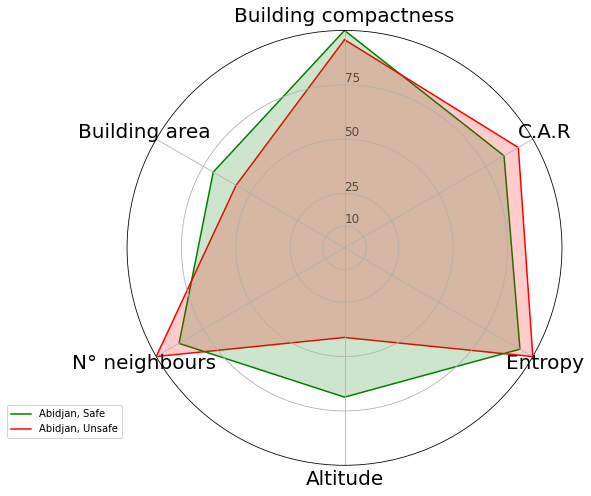

In [8]:
## PLOT ABIDJAN STATS

df = final_table[['ID',
                  #'Mean compactness',
                  'Mean compactness (scaled)',
                  #'Mean C.A.R',
                  'Mean C.A.R (scaled)',
                  #'Mean deviation',
                  'Entropy indicator (scaled)',
                  #'Mean elevation',
                  'Mean elevation (scaled)',
                  #'Mean No neighbours in 100m',
                  'NN 100 (scaled)',
                  #'Bulding footprint',
                  'Bulding footprint (scaled)']].copy()

df = df.rename(columns={"Mean compactness": "Building compactness",
                        "Mean compactness (scaled)": "Building compactness",
                        "Mean C.A.R": "C.A.R",
                        "Mean C.A.R (scaled)": "C.A.R",
                        "Mean deviation": "Entropy",
                        "Entropy indicator (scaled)": "Entropy",
                        "Topographic variance": "Altitude",
                        "NN 100 (scaled)": "N° neighbours",
                        "Bulding footprint": "Building area",
                        "Bulding footprint (scaled)": "Building area",
                        'Mean elevation': 'Altitude',
                        'Mean elevation (scaled)': 'Altitude'})
group_var = 'ID'
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# set figure size
plt.figure(figsize=(8,8))

# Initialise spider plot
ax = plt.subplot(111, polar=True)
 
# First axis on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
g_order = 1
plt.xticks(angles[:-1], categories, color='black', size=20, zorder=g_order)
# ylabels
ax.set_rlabel_position(0)
plt.yticks([10,25,50,75], ["10","25","50","75"], color="black", size=12, alpha=0.6, zorder=g_order)
plt.ylim(0,100)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data

g_order = 0

# Abidjan, safe (loc=0)
values=df.loc[0].drop(group_var).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='solid', color='green', label=df.loc[0][0], zorder=g_order)
ax.fill(angles, values, 'green', alpha=0.2)
 
# Abiidjan, unsafe (loc=1)
values=df.loc[1].drop(group_var).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='solid', color='red', label=df.loc[1][0], zorder=g_order)
ax.fill(angles, values, 'red', alpha=0.2)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0, 0.15))

# Show graph
plt.show()

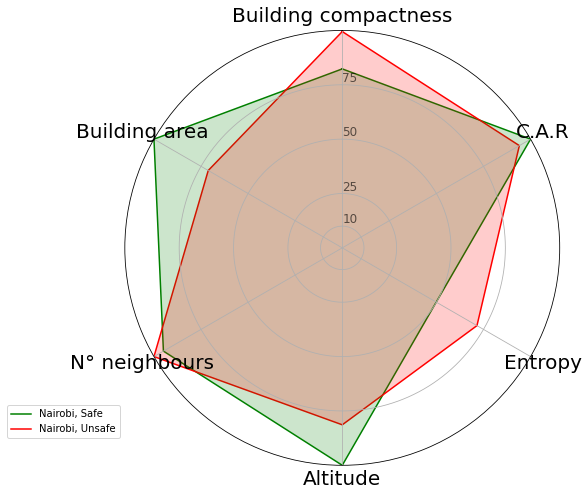

In [9]:
df = final_table[['ID',
                  #'Mean compactness',
                  'Mean compactness (scaled)',
                  #'Mean C.A.R',
                  'Mean C.A.R (scaled)',
                  #'Mean deviation',
                  'Entropy indicator (scaled)',
                  #'Mean elevation',
                  'Mean elevation (scaled)',
                  #'Mean No neighbours in 100m',
                  'NN 100 (scaled)',
                  #'Bulding footprint',
                  'Bulding footprint (scaled)']].copy()

df = df.rename(columns={"Mean compactness": "Building compactness",
                        "Mean compactness (scaled)": "Building compactness",
                        "Mean C.A.R": "C.A.R",
                        "Mean C.A.R (scaled)": "C.A.R",
                        "Mean deviation": "Entropy",
                        "Entropy indicator (scaled)": "Entropy",
                        "Topographic variance": "Altitude",
                        "NN 100 (scaled)": "N° neighbours",
                        "Bulding footprint": "Building area",
                        "Bulding footprint (scaled)": "Building area",
                        'Mean elevation': 'Altitude',
                        'Mean elevation (scaled)': 'Altitude'})
group_var = 'ID'
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# set figure size
plt.figure(figsize=(8,8))

# Initialise spider plot
ax = plt.subplot(111, polar=True)
 
# First axis on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
g_order = 1
plt.xticks(angles[:-1], categories, color='black', size=20, zorder=g_order)
# ylabels
ax.set_rlabel_position(0)
plt.yticks([10,25,50,75], ["10","25","50","75"], color="black", size=12, alpha=0.6, zorder=g_order)
plt.ylim(0,100)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data

g_order = 0

# Nairobi, safe (loc=2)
values=df.loc[2].drop(group_var).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='solid', color='green', label=df.loc[2][0], zorder=g_order)
ax.fill(angles, values, 'green', alpha=0.2)
 
# Nairobi, unsafe (loc=3)
values=df.loc[3].drop(group_var).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='solid', color='red', label=df.loc[3][0], zorder=g_order)
ax.fill(angles, values, 'red', alpha=0.2)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0, 0.15))

# Show graph
plt.show()